# Customer Segmentation

In [28]:
# Import required libraries
import os
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [29]:
# Read CSV and load to dataframe
os.chdir("c:\\Users\\Min Dator\\NodBootcamp\\BC#3\\Projects\\4. CustomerSegmentation\\data")
df = pd.read_csv("online_retail_II.csv", low_memory=False)

## Data Prep

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/10 08:26 AM,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/10 08:26 AM,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/10 08:26 AM,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/10 08:26 AM,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/10 08:26 AM,3.39,17850.0,United Kingdom


In [30]:
df.head(30)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/10 08:26 AM,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/10 08:26 AM,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/10 08:26 AM,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/10 08:26 AM,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/10 08:26 AM,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/01/10 08:26 AM,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/01/10 08:26 AM,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/01/10 08:28 AM,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/01/10 08:28 AM,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,12/01/10 08:34 AM,4.25,13047.0,United Kingdom


In [4]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [5]:
# Populate Monetary
total_sales_per_customer = df.groupby('Customer ID').apply(lambda x: (x['Quantity'] * x['Price']).sum()).reset_index(name='Monetary')
total_sales_per_customer

,Customer ID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [6]:
# Populate Frequency
unique_invoices_per_customer = df.groupby('Customer ID')['Invoice'].nunique().reset_index(name='Frequency')
unique_invoices_per_customer

,Customer ID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [7]:
# Populate Recency

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format='%m/%d/%y %I:%M %p')
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [8]:
max_date = max(df["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [9]:
df["recency"] = max_date - df["InvoiceDate"]

In [10]:
recency_per_customer = df.groupby('Customer ID')['recency'].min().reset_index(name='Recency')
recency_per_customer

,Customer ID,Recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [11]:
recency_per_customer["Recency"] = recency_per_customer["Recency"].dt.days
recency_per_customer

,Customer ID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [12]:
customer_details = total_sales_per_customer.merge(unique_invoices_per_customer, on='Customer ID').merge(recency_per_customer, on='Customer ID')
customer_details

,Customer ID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309
...,...,...,...,...
4367,18280.0,180.60,1,277
4368,18281.0,80.82,1,180
4369,18282.0,176.60,3,7
4370,18283.0,2094.88,16,3


In [13]:
customer_details.describe()

,Customer ID,Monetary,Frequency,Recency
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,1898.463818,5.075480,91.047118
std,1722.390705,8219.344627,9.338754,100.765435
min,12346.000000,-4287.630000,1.000000,0.000000
25%,13812.750000,293.362500,1.000000,16.000000
50%,15300.500000,648.075000,3.000000,49.000000
75%,16778.250000,1611.725000,5.000000,142.000000
max,18287.000000,279489.020000,248.000000,373.000000


In [14]:
rfm_columns = ['Monetary','Frequency','Recency']
for column in rfm_columns:
    Q1 = customer_details[column].quantile(0.25)
    Q3 = customer_details[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering outliers
    customer_details = customer_details[(customer_details[column] >= lower_bound) & (customer_details[column] <= upper_bound)]

In [15]:
customer_details

,Customer ID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309
6,12353.0,89.00,1,203
...,...,...,...,...
4366,18278.0,173.90,1,73
4367,18280.0,180.60,1,277
4368,18281.0,80.82,1,180
4369,18282.0,176.60,3,7


## Check Inertia Score

In [16]:
inertia_dict = {
    'clusters': [],
    'inertia':[]
}

for i in range(2,11):
    scaler = StandardScaler()
    cluster = KMeans(n_clusters=i)
    pipe = make_pipeline(scaler, cluster)
    pipe.fit(customer_details[['Recency','Frequency','Monetary']])
    inertia_dict['clusters'].append(i)
    inertia_dict['inertia'].append(pipe['kmeans'].inertia_)

inertia_df = pd.DataFrame(inertia_dict)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

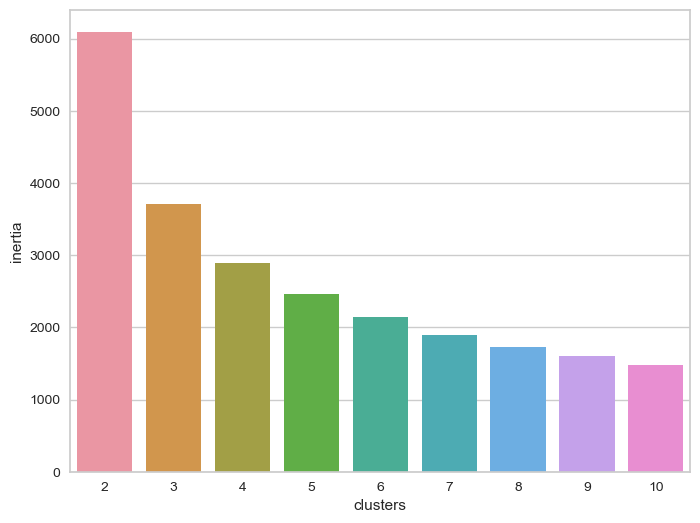

In [17]:
plt.figure(figsize=(8,6))
g= sns.barplot(data=inertia_df,x='clusters',y='inertia')

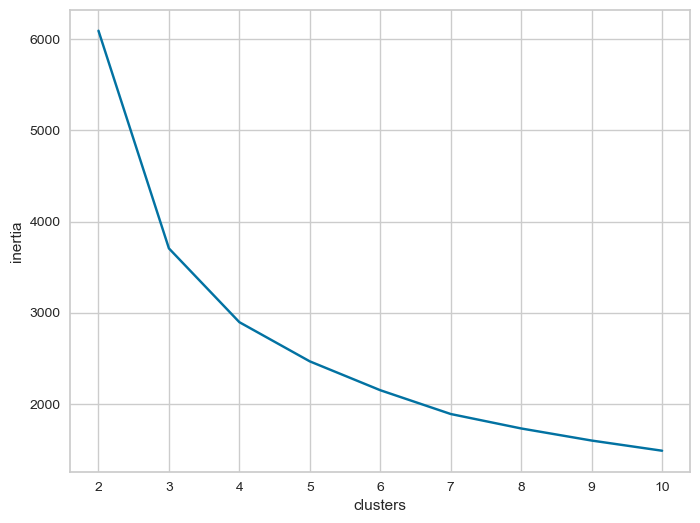

In [18]:
plt.figure(figsize=(8,6))
g= sns.lineplot(data=inertia_df,x='clusters',y='inertia')

## Determine Optimal Clusters

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

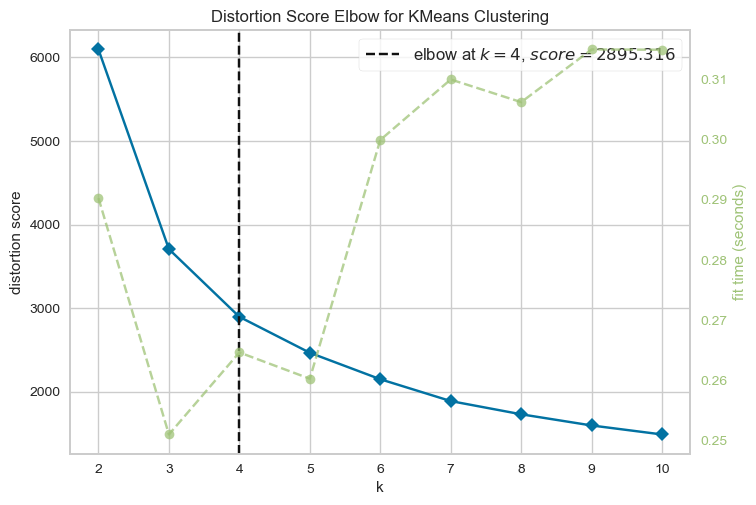

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
pipe = make_pipeline(StandardScaler(), KElbowVisualizer(KMeans()))
pipe.fit(customer_details[['Recency','Frequency','Monetary']])
pipe[1].show()

## Create the Clusters

In [20]:
pipe = make_pipeline(StandardScaler(), KMeans(n_clusters=4, random_state=42))
pipe.fit(customer_details[['Recency','Frequency','Monetary']])
customer_details["cluster"] = pipe["kmeans"].labels_

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Cluster Interpretation

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


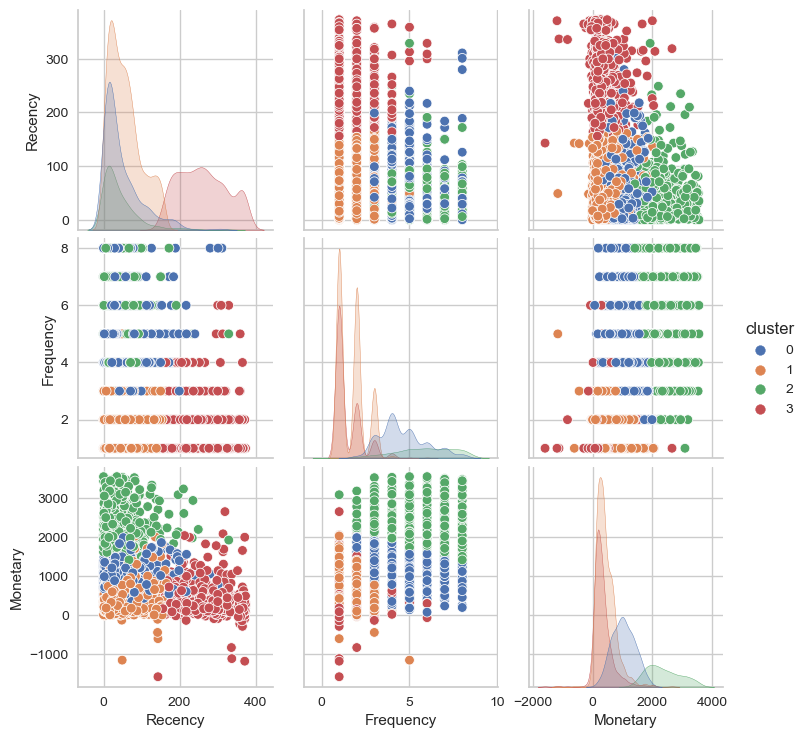

In [21]:
sns.pairplot(customer_details, hue='cluster', vars=['Recency', 'Frequency', 'Monetary'], palette="deep")

## Cluster Classification
 - 2 - High Value Active: High Monetary High Frequency High Recency
 - 0 - Engaged Mid-Tier: Medium Monetary High Frequency High Recency
 - 3 - Inactive Low Value: Low Monetary Low Recency Low Frequency
 - 1 - New/Returning Low Value: Low Monetary High Recency Low Frequency

In [22]:
cluster_map = {
    2: "High Value Active",
    0: "Engaged Mid-Tier",
    3: "Inactive Low Value",
    1: "New/Returning Low Value"
}

customer_details['cluster'] = customer_details['cluster'].map(cluster_map)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


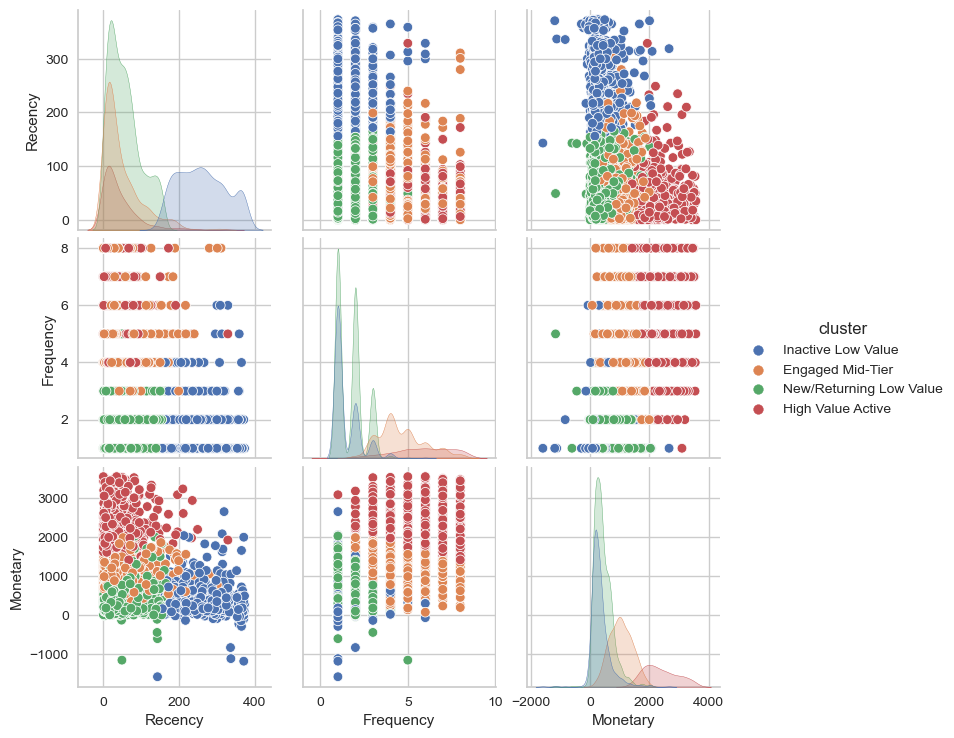

In [23]:
sns.pairplot(customer_details, hue='cluster', vars=['Recency', 'Frequency', 'Monetary'], palette="deep")

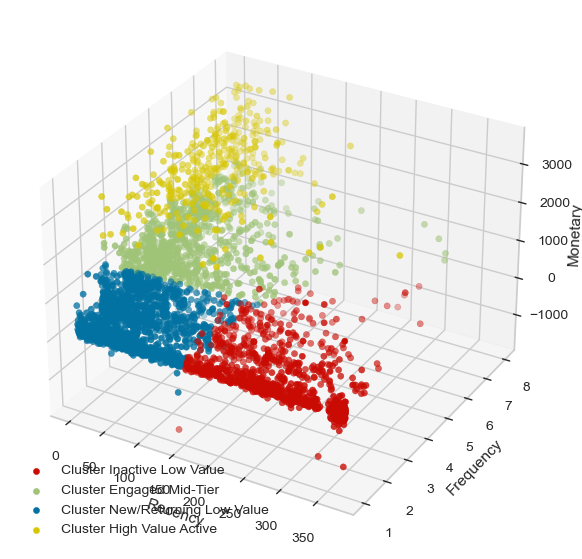

In [24]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']  # colors for the clusters, extend if needed

for cluster, color in zip(customer_details['cluster'].unique(), colors):
    subset = customer_details[customer_details.cluster == cluster]
    ax.scatter(subset['Recency'], subset['Frequency'], subset['Monetary'], c=color, label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()
plt.show()


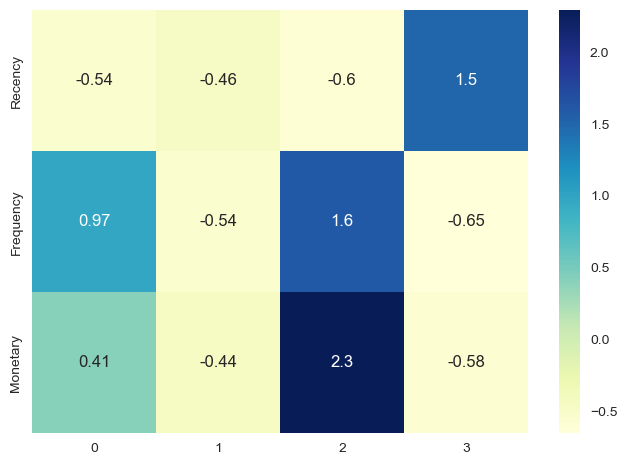

In [27]:
centroids = pipe["kmeans"].cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['Recency', 'Frequency', 'Monetary'])

sns.heatmap(centroid_df.T, annot=True, cmap="YlGnBu")
plt.show()


## Actionable Insights
 - High Value Active Customers: Reward with loyalty programs, and capitalize on cross-selling and up-selling opportunities.
 - Engaged Mid-Tier Customers: Promote higher-tier offerings and enhance their brand connection with exclusive content or referral incentives.
 - Inactive Low Value Customers: Initiate reactivation campaigns, gather feedback, and introduce budget-friendly offerings.
 - New/Lapsed Low Value Customers: Offer memorable onboarding experiences for newcomers and win-back campaigns for returning customers.

## Presentation Slides
 - Title
 - Intro
 - Data & RFM definition
 - CLuster 
 - Visualization 1
 - Visualization 2
 - Visualization 3
 - Challenges / Learnings / Highlights